
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# TP5

#### Israel Pavelek

#### Ejercicio 1

Se desea digitalizar una señal cuyo espectro se muestra a continuación, trazado en azul.

<img src="./ej1.png" align="center" width="600" /> 

El rango de frecuencias de interés se centra entre DC y 10 kHz, mientras que las frecuencias superiores a esta no aportan información.

Se sabe que el sistema digital introduce un ruido de densidad espectral constante, que se encuentra en 60 dB por debajo del nivel máximo de la señal. 

Este ruido es consecuencia de los errores de cuantificación y del ruido propio de la electrónica del conversor, y no puede ser eliminado. El mismo está representado en el trazo rojo. 

A partir de lo anterior, se pide:

* A- Definir un valor para la frecuencia de muestreo (fs) del ADC, justificando su respuesta.
* B- Diseñar un filtro analógico pasa bajo anti alias, esto es, que atenúe las componentes frecuenciales ubicadas por encima de la frecuencia de Nyquist, para evitar efecto alias. Explicar el criterio utilizado para fijar la atenuación en la banda detenida.
* C- Repetir el punto b), pero eligiendo una fs diez veces más grande a la elegida en a). Comparar ambos filtros anti alias y evaluar las ventajas/desventajas de esta modificación.
* D- Repetir el punto b), pero considerando que se requiere una fase aprox. lineal hasta 10 kHz.


## 1 A

El valor teórico para muestrear una señal es el doble de la frecuencia máxima en donde tengamos información, en este caso tenemos información hasta 10KHz, la frecuencia teórica minima para muestrear sin perder información sería 20KHz, perodado que dicho valor es muy ajustado definimos como valor 25KHz a fin de tener margen y que no exista aleasing. 

## 1 B

Para diseñar un filtro anti alias, debemos tomar como frecuencia de corte fs/2 es decir 12.5KHz, la atenuación en la banda de paso podría ser cualquiera menor a 3dB, por simplicidad y para adoptar un filtro de Butterworth tomamos este valor. La señal en 10KHz esta 40dB por debajo de su valor máximo (en potencia) , como el piso de ruido esta 60dB por debajo con un filtro de primer orden que atenue 20dB en una decada alcanza. Es decir un filtro de primer orden.

<img src="./antialias.png" align="center" width="400" /> 


Nuestro filtro puede ser RC en donde $\frac{1}{2\cdot \pi RC}=12.5KHz$
si adoptamos C= 10nf
$R=1.2732K\Omega$ Adoptamos $1.2K\Omega$ por ser un valor comercial

## 1 C

Ahora si tomammos fs=250KHz la frecuencia de corte la diponemos en 125KHz

Nuestro filtro puede ser RC en donde $\frac{1}{2\cdot \pi RC}=125KHz$
si adoptamos C= 1nf
$R=1.2732K\Omega$ Adoptamos $1.2K\Omega$ por ser un valor comercial

<img src="./antialias2.png" align="center" width="400" /> 



## 1 D

Si se requiere una fase lineal el filtro ahora a diseñar es un filtro de Bessel.




#### Ejercicio 2

Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de orden 2, con fc=1 kHz. 

* A- Para fs=100 kHz y aplicando transformación bilineal, obtener un filtro con respuesta  H(z) cuyo comportamiento emule al Butterworth analógico. 
Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.

* B- Repetir el punto anterior para fs=10 kHz.

* C- Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con fc=6 kHz 

* D- Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.



El filtro de Butterworth de segundo orden normalizado sabemos que es de la forma: 

$$F(s)=\frac{1}{s^2+s\sqrt2+1}$$

Desnormalizando $s=\frac{s}{2 \pi 1KHz}$

$F(s)=\frac{(2\pi1KHz)^2}{s^2+s \cdot 2\pi1KHz\sqrt2+(2\pi1KHz)^2}$

$$F(s)=\frac{(2\pi1KHz)^2}{s^2+s \cdot 2\pi1KHz\sqrt2+(2\pi1KHz)^2}$$


Aplicando la transformación bilineal

$s=\frac{2}{T} \cdot \frac{1-Z^{-1}}{1+Z^{-1}}$

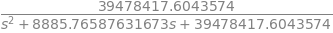

In [32]:
from sympy import *
init_printing(use_unicode=True)
s, Z = symbols('s Z',relational=True)

fc=1*10**3
wc=2*np.pi*fc
F=(wc)**2/(s*s+wc*np.sqrt(2)*s+wc**2)
F


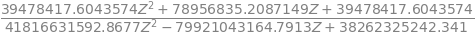

In [33]:
fs=100*10**3
Fz=F.subs(s,2*fs * (Z-1)/(Z+1))
simplify(Fz)

Text(0, 0.5, 'Fase (radians)')

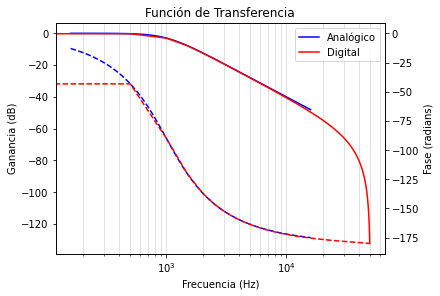

In [34]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

fc=1000
fs=100*10**3
fig, ax = plt.subplots(constrained_layout=True)

sys_digital1 = signal.TransferFunction([39478417.60,78956835.20,39478417.60], [41816631592.86, -79921043164.79,38262325242.34], dt=1/fs)
sys_analogico = signal.TransferFunction([(2*np.pi*fc)**2], [1, 2*np.pi*fc*np.sqrt(2), (2*np.pi*fc)**2])


wa, maga,phasea = sys_analogico.bode()
wd1, magd1,phased1 = signal.dbode(sys_digital1)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd1/(2*math.pi), magd1,color='r',label='Digital ')


ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd1/(2*math.pi), phased1,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')




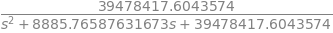

In [35]:
fc=1*10**3
wc=2*np.pi*fc
F=(wc)**2/(s*s+wc*np.sqrt(2)*s+wc**2)
F

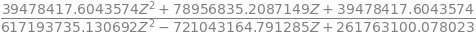

In [36]:
fs=10*10**3
Fz=F.subs(s,2*fs * (Z-1)/(Z+1))
simplify(Fz)

Text(0, 0.5, 'Fase (radians)')

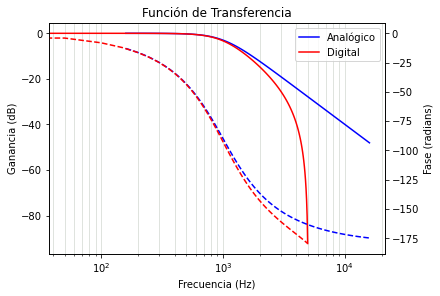

In [37]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

fc=1000
fs=10*10**3
fig, ax = plt.subplots(constrained_layout=True)

sys_digital1 = signal.TransferFunction([39478417.60,78956835.20,39478417.60], [617193735.13, -721043164.79,261763100.07], dt=1/fs)
sys_analogico = signal.TransferFunction([(2*np.pi*fc)**2], [1, 2*np.pi*fc*np.sqrt(2), (2*np.pi*fc)**2])


wa, maga,phasea = sys_analogico.bode()
wd1, magd1,phased1 = signal.dbode(sys_digital1)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd1/(2*math.pi), magd1,color='r',label='Digital ')

ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd1/(2*math.pi), phased1,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')




### Punto C


Para el pasa alto tenemos

$$F(s)=\frac{1}{s^2+s\sqrt2+1}$$

Desnormalizando $s=\frac{s}{2 \pi 6KHz}$

$F(s)=\frac{(2\pi6KHz)^2}{s^2+s \cdot 2\pi6KHz\sqrt2+(2\pi6KHz)^2}$

$$F(s)=\frac{(2\pi6KHz)^2}{s^2+s \cdot 2\pi6KHz\sqrt2+(2\pi6KHz)^2}$$

Primero vamos a aplicar la transformacion para pasa alto donde $s=\frac{1}{s}$

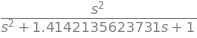

In [38]:
from sympy import *
init_printing(use_unicode=True)
s, Z = symbols('s Z',relational=True)
Fpa=(s*s/(s*s+np.sqrt(2)*s+1))
Fpa

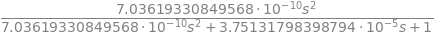

In [39]:
Fpa=Fpa.subs(s,s/(2*np.pi*6000))
simplify(Fpa)

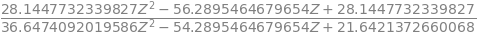

In [40]:
fs=100*10**3
Fz=Fpa.subs(s,2*fs * (Z-1)/(Z+1))
simplify(Fz)

C:\Users\ipave\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3839: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


Text(0, 0.5, 'Fase (radians)')

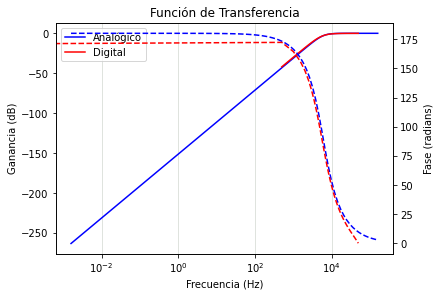

In [41]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

fc=1000
fs=100*10**3
fig, ax = plt.subplots(constrained_layout=True)

sys_digital1 = signal.TransferFunction([28.14,-56.28,28.14], [36.64,-54.8,21.64], dt=1/fs)
sys_analogico = signal.TransferFunction([7.03*10**(-10),0,0], [7.03*10**(-10),3.75*10**(-5), 1])

wa, maga,phasea = sys_analogico.bode()
wd1, magd1,phased1 = signal.dbode(sys_digital1)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd1/(2*math.pi), magd1,color='r',label='Digital ')

ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd1/(2*math.pi), phased1,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')


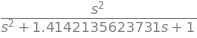

In [42]:
from sympy import *
init_printing(use_unicode=True)
s, Z = symbols('s Z',relational=True)
Fpa=(s*s/(s*s+np.sqrt(2)*s+1))
Fpa


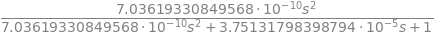

In [43]:
Fpa=Fpa.subs(s,s/(2*np.pi*6000))
simplify(Fpa)

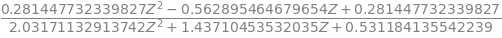

In [44]:
fs=10*10**3
Fz=Fpa.subs(s,2*fs * (Z-1)/(Z+1))
simplify(Fz)

C:\Users\ipave\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3839: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


Text(0, 0.5, 'Fase (radians)')

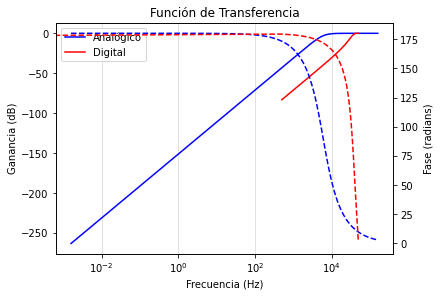

In [45]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

fs=10*10**3
fs=100*10**3
fig, ax = plt.subplots(constrained_layout=True)

sys_digital1 = signal.TransferFunction([0.2814,-0.5628,0.2814], [2.031,1.4371,0.5311], dt=1/fs)
sys_analogico = signal.TransferFunction([7.03*10**(-10),0,0], [7.03*10**(-10),3.75*10**(-5), 1])


wa, maga,phasea = sys_analogico.bode()
wd1, magd1,phased1 = signal.dbode(sys_digital1)

ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')
ax.semilogx(wd1/(2*math.pi), magd1,color='r',label='Digital ')

ax2.grid(True, which='both', axis='x', color='xkcd:light grey')

ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()
ax2 = ax.twinx()

ax2.semilogx(wa/(2*math.pi), phasea,color='b',linestyle='dashed')
ax2.semilogx(wd1/(2*math.pi), phased1,color='r',linestyle='dashed')
ax2.set_ylabel('Fase (radians)')

Aplicariamos pre-Warping en el ultimo caso, en los que muestramos a 100KHz no hay deformación, en el pasabajo, no es notable en las frecuencias de interes, en el pasa alto encambio podriamos ajustar con pre-warping la frecuencia de corte para que matche directamente.

#### Ejercicio 3

Dadas las siguientes respuestas al impulso se pide:

* Transferencia del sistema H(z)
* Singularidades en el plano z
* Respuesta de módulo y fase

a) Filtro de media móvil (moving average).

$h_1(k)=(1,1)$ significa   h(0)=1 y h(1)=1
$h_2(k)=(1,1,1)$

* ¿Qué modificación debería implementarse para que la salida representa la media aritmética?
* Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

b) Filtro diferenciador 

$h_1(k)=(1,−1)$ de primer orden
$h_2(k)=(1,0,−1)$ de segundo orden

* ¿Qué demora introducen ambos sistemas?
* Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a  $|H(\Omega)|=\Omega$.

a)
$H_1(Z)=Z+1$
$H_2(Z)=Z^2+Z+1$

Singularidades

$H_1(Z)$:

Cero en Z=-1

$H_2(Z)$:

Ceros en $Z=-0.5±\frac{\sqrt(3)}{2}$



$H_1(e^{j\Omega})=e^{j\Omega}+1$

$H_1(e^{j\Omega})=e^{\frac{j\Omega}{2}}(e^{\frac{j\Omega}{2}}+e^{\frac{-j\Omega}{2}})$

$$H_1(e^{j\Omega})=e^{\frac{j\Omega}{2}}(2cos(\frac{\Omega}{2} )$$

##### Modulo

$$|H_1(e^{j\Omega})|=2|cos(\frac{\Omega}{2})|$$



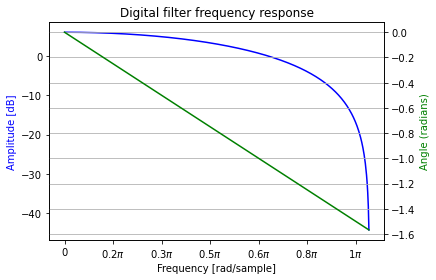

Zeros:
[-1.]
Polos:
[]


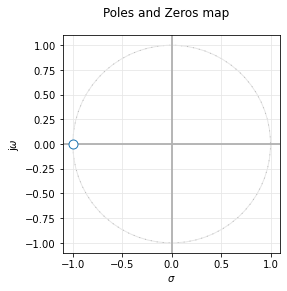

In [46]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator
import control 


num=[1,1]
den=[1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())


Para $H_2(Z)$:

##### Modulo

$$H_2(e^{j\Omega})=e^{j\Omega}(e^{j\Omega}+1+e^{-j\Omega})$$

$$H_2(e^{j\Omega})=e^{j\Omega}(2cos(\Omega)+1)$$

$$|H_2(e^{j\Omega})|=|2\cdot(cos(\Omega)+1)|$$


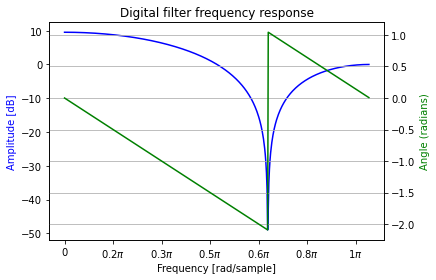

Zeros:
[-0.5+0.8660254j -0.5-0.8660254j]
Polos:
[]


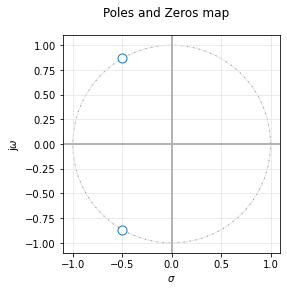

In [47]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


num=[1,1,1]
den=[1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

Para que sea la media aritmética deberia dividir por la cantidad de muestras es decir 1/N. siendo 2 en el primero y 3 en el segundo.

Si queremos eliminar la frecuencia de 50Hz debemos matchear $\frac{6\pi}{9}$ con 50Hz

Dado que fs/2 matchea con $\pi$

$$\frac{50Hz \cdot \pi}{6 \cdot \pi}=\frac{f_s}{2}$$

$$fs=150Hz$$

### Parte B

b) Filtro diferenciador 

$H_1(Z)=Z−1$

$H_2(Z)=Z^2-1$

$H_1(Z)=Z−1$

Cero en Z=1



$H_1(e^{j\Omega})=e^{j\Omega}-1$

$H_1(e^{j\Omega})=e^{\frac{j\Omega}{2}}(e^{\frac{j\Omega}{2}}-e^{\frac{-j\Omega}{2}})$

$$H_1(e^{j\Omega})=e^{\frac{j\Omega}{2}}(2jsin(\frac{\Omega}{2} )$$

##### Modulo

$$|H_1(e^{j\Omega})|=2|sin(\frac{\Omega}{2})|$$


C:\Users\ipave\AppData\Local\Temp/ipykernel_20280/941874360.py:15: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


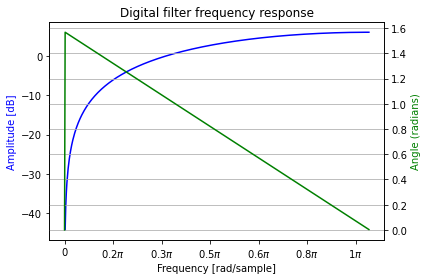

Zeros:
[1.]
Polos:
[]


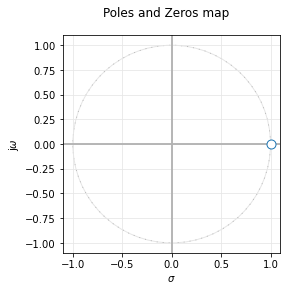

In [48]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


num=[1,-1]
den=[1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())


Para $H_2(Z)$:



$$H_2(e^{j\Omega})=e^{j\Omega}(e^{j\Omega}-e^{-j\Omega})$$

$$H_2(e^{j\Omega})=e^{j\Omega}(2jsin(\Omega))$$

##### Modulo

$$|H_2(e^{j\Omega})|=2\cdot|(sin(\Omega))|$$

C:\Users\ipave\AppData\Local\Temp/ipykernel_20280/3374312097.py:15: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


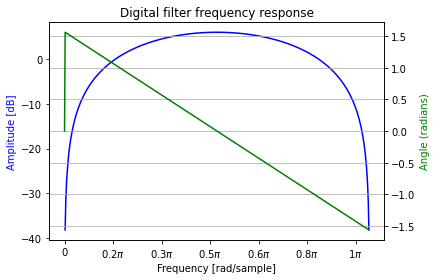

Zeros:
[-1.  1.]
Polos:
[]


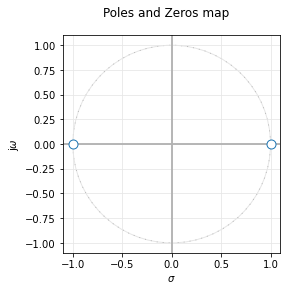

In [49]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


num=[1,0,-1]
den=[1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

* ¿Qué demora introducen ambos sistemas?

El sistema de primer orden introduce una demora de una muestra de entrada (la inmediatamente anterior)

$H(Z)=\frac{Y(Z)}{X(Z)}$

$Z-1=\frac{Y(Z)}{X(Z)}$

$ZX(Z)-1X(Z)=Y(Z)$

$X(Z)-X(Z)Z^{-1}=Y(Z)Z^{-1}$

Antitransformando:

$x(n)-x(n-1)=y(n-1)$

El segundo sistema (de segundo orden) tambien introduce una demora, pero lo hace con respecto a dos muestras anteriores. 

$H(Z)=\frac{Y(Z)}{X(Z)}$

$Z^2-1=\frac{Y(Z)}{X(Z)}$

$Z^2X(Z)-1X(Z)=Y(Z)$

$X(Z)-X(Z)Z^{-2}=Y(Z)Z^{-2}$

Antitransformando:

$x(n)-x(n-2)=y(n-2)$

* Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a  $|H(\Omega)|=\Omega$.

Vamos a obtener el modulo de H(Z) 

Primer caso:

$H(Z)=Z-1$

$H(e^{j\Omega})=e^{j\Omega}-1$

$H(e^{j\Omega})=e^{\frac{j\Omega}{2}}(e^{\frac{j\Omega}{2}}-e^{\frac{-j\Omega}{2}})$

$H(e^{j\Omega})=e^{\frac{j\Omega}{2}}(2j sin(\frac{\Omega}{2}))$

$H(e^{j\Omega})=2j e^{\frac{j\Omega}{2}}sin(\frac{\Omega}{2})$

$H(e^{j\Omega})=2e^{j\frac{\pi}{2}} e^{\frac{j\Omega}{2}}sin(\frac{\Omega}{2})$

$H(e^{j\Omega})=2e^{j(\frac{\Omega}{2}+\frac{\pi}{2})}sin(\frac{\Omega}{2})$

$|H(e^{j\Omega})|=2 |sin(\frac{\Omega}{2})|$




$\frac{\Omega-2|sin(\frac{\Omega}{2})|}{\Omega}<\frac{5}{100}$

Como estudiamos la funcion de 0 a $\pi\$ en ese ambito el modulo es igual a seno de la función

$100\Omega-200sin(\frac{\Omega}{2})<5\Omega$

$95\Omega<200sin(\frac{\Omega}{2})$

$0,95<\frac{sin(\frac{\Omega}{2})}{\frac{\Omega}{2}}$

Hacemos un cambio de variable $\Omega=x$

$0,95x<sin(x)$

Buscamos el limite donde se encuentran

$0,95x=sin(x)$

$x=arcsin(0,95)$

$x<0.39\pi$

Como x=$\frac{\Omega}{2}$

$\frac{\Omega}{2}<0.39\pi$

$\Omega<0.79\pi$

Dependiendo el frecuencia de muestreo podriamos obtener el valor en frecuencia en donde el error cae mas del 5%.

Segundo caso:

$H(Z)=Z^2-1$

$H(e^{j\Omega})=e^{2j\Omega}-1$

$H(e^{j\Omega})=e^{j\Omega}(e^{j\Omega}-e^{-j\Omega})$

$H(e^{j\Omega})=2e^{j(\Omega +\frac{\pi}{2})}(sin(\Omega))$

$|H(e^{j\Omega})|=2|sin(\Omega)|$

El análisis es el mismo solo  que la variable $\Omega$ es es doble por lo tanto nos quedará la mitad del valor

$\Omega<0.39\pi$



C:\Users\ipave\AppData\Local\Temp/ipykernel_20280/941874360.py:15: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


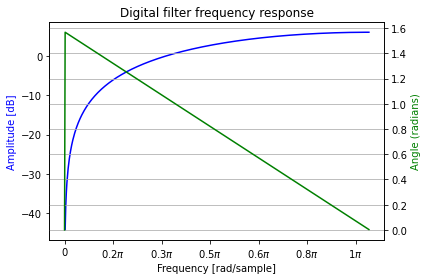

Zeros:
[1.]
Polos:
[]


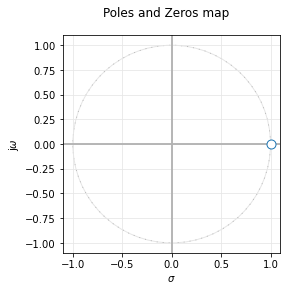

In [50]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


num=[1,-1]
den=[1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

C:\Users\ipave\AppData\Local\Temp/ipykernel_20280/3374312097.py:15: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


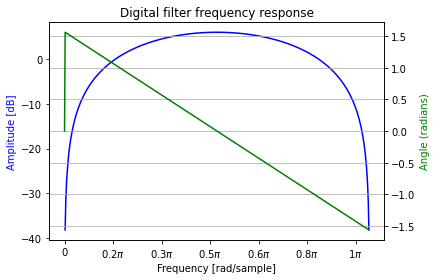

Zeros:
[-1.  1.]
Polos:
[]


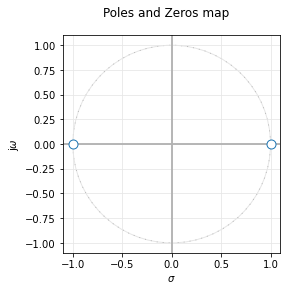

In [51]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


num=[1,0,-1]
den=[1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

 #### Ejercicio 4

 Dado el siguiente esquema:
 
 <img src="./ej4.png" align="center" width="600" /> 
  

a) Comprobar que el esquema se corresponde con la siguiente transferencia:

$$\frac{Y(Z)}{X(Z)}=(1-c_1Z^{-N}) \cdot \frac{b_0+b_1Z^{-1}+b_2Z^{-2}}{(\frac{1}{a_0}-a_1Z^{-1}-a_2Z^{-2})}$$

Para los siguientes incisos calcular y representar:

* Singularidades en el plano z
* Respuesta de módulo y fase deHz

b) Filtro de media móvil ( moving average ó CIC: cascaded integrator comb   )

Verificar la transferencia para $a_0=1, a_1=1, b_0=\frac{1}{N}, c_1=1 y N=(1, 3 y 5)$

$$H(Z)=\frac{1}{N}\frac{1-Z^{-N}}{1-Z^{-1}}$$

* ¿Es un filtro IIR o FIR ?
* Discuta las ventajas que tendría esta implementación respecto al filtro FIR de media móvil.
* ¿Podría implementar el siguiente sistema h6(k)=1,1,1,1,1,1,1 con esta topología ?

c) Filtro diferenciador 

Qué valores deberían tener los coeficientes $a_i$ y $b_k$ para obtener:

* Diferenciador de primer orden.
* Diferenciador de segundo orden.

d) Integrador con pérdidas. 

Qué tipo de transferencia se obtendría si : $a_0=1, a_1=1-\alpha , b0=\alpha$ para $\alpha=0.9$

¿Qué sucedería si $\alpha=0$ y la señal de entrada del sistema tuviera un valor medio diferente de cero?

e) Filtro elimina continua. (DC Blocker)

Verifique la transferencia que se obtendría si $a_0=1,a_1=\alpha, b_0=1, b_1=−1$ para $\alpha=0.9$. Determine $\alpha$ para que la transferencia en $\Omega=0,1\pi$  sea 3 dB menor a la transferencia  en $\Omega=\pi$.

f) Filtro ecualizador de fase de 1º orden. 

Verifique la transferencia que se obtendría si $a_0=1, a_1=−R, b_0=R, b_1=1$ para $R=\frac{−D}{D+2}$ y siendo D un valor de demora de -0,5 a 0,5 muestras $(\frac{1}{fs})$. 

En qué valores de frecuencia este filtro obtendría un retardo de grupo acotado en un margen del 5% respecto a $\Omega=0$. Verificar que la demora obtenida es de 1+D muestras.


 Definimos dos puntos auxiliares para encontrar la transferencia:
 
 <img src="./ej4_2.png" align="center" width="600" /> 
 
$\frac{Y(Z)}{X(Z)}=\frac{Y(Z)}{A(Z)}\cdot \frac{A(Z)}{X(Z)}$


ec1:$B(Z)=a_0[A(Z)+a_1B(Z)Z^{-1}+a_2B(Z)Z^{-2}]$

ec2:$Y(Z)=b_0B(Z)+b_1B(Z)Z^{-1}+b_2B(Z)Z^{-2}$

de ec1 despejamos B:

$B(Z)\cdot(1-a_0a_1Z^{-1}-a_0a_2Z^{-2})=a_0A(Z)$

$B(Z)=\frac{A(Z)}{(\frac{1}{a_0}-a_1Z^{-1}-a_2Z^{-2})}$

En la ec2:

$Y(Z)=B(Z)(b_0+b_1Z^{-1}+b_2Z^{-2})$

Reemplazamos B(Z) y queda:

$Y(Z)=\frac{A(Z)}{(\frac{1}{a_0}-a_1Z^{-1}-a_2Z^{-2})}\cdot(b_0+b_1Z^{-1}+b_2Z^{-2})$

$\frac{Y(Z)}{A(Z)}=\frac{b_0+b_1Z^{-1}+b_2Z^{-2}}{(\frac{1}{a_0}-a_1Z^{-1}-a_2Z^{-2})}$

$A(Z)=X(Z)-c_1X(Z)Z^{-N}$

$\frac{A(Z)}{X(Z)}=1-c_1Z^{-N}$

$\frac{Y(Z)}{X(Z)}=(1-c_1Z^{-N}) \cdot \frac{b_0+b_1Z^{-1}+b_2Z^{-2}}{(\frac{1}{a_0}-a_1Z^{-1}-a_2Z^{-2})}$



## Punto b

Si N=1
    
$$H(Z)=1$$
    
Si N=3

$$H(Z)=\frac{1}{3}\cdot \frac{1-Z^{-3}}{1-Z^{-1}}$$
    
$$H(Z)=\frac{1}{3}\cdot \frac{Z^3-1}{Z^3-Z^2}$$
    
$$H(Z)=\frac{1}{3}\cdot \frac{Z^3-1}{Z^2 \cdot (Z-1)}$$

$$H(Z)=\frac{1}{3}\cdot \frac{(Z-1)(Z^2+Z+1)}{Z^2 \cdot (Z-1)}$$

$$H(Z)=\frac{1}{3}\cdot \frac{(Z^2+Z+1)}{Z^2}$$

Para obtener el modulo reemplazamos $Z=e^{j\Omega}$

$$H(e^{j\Omega})=\frac{1}{3}\cdot \frac{(e^{j2\Omega}+e^{j\Omega}+1)}{e^{2j\Omega}}$$

$$H(e^{j\Omega})=\frac{1}{3}\cdot \frac{(e^{j\Omega}(e^{j\Omega}+e^{-j\Omega}+1)}{e^{2j\Omega}}$$

$$H(e^{j\Omega})=\frac{1}{3}\cdot e^{-j\Omega}(e^{j\Omega}+e^{-j\Omega}+1)$$

$$H(e^{j\Omega})=\frac{2}{3}\cdot e^{-j\Omega}(cos(\Omega)+\frac12)$$

$$|H(e^{j\Omega})|=\frac{2}{3}|(cos(\Omega)+\frac12)|$$

Si N=5

$$H(Z)=\frac{1}{5}\cdot \frac{1-Z^{-5}}{1-Z^{-1}}$$

$$H(Z)=\frac{1}{5}\cdot \frac{Z^5-1}{Z^5-Z^4}$$

$$H(Z)=\frac{1}{5}\cdot \frac{Z^5-1}{Z^4\cdot (Z-1)}$$
    

    
    

In [52]:
np.roots([1,0,0,0,0,-1])


array([-0.80901699+0.58778525j, -0.80901699-0.58778525j,
        0.30901699+0.95105652j,  0.30901699-0.95105652j,
        1.        +0.j        ])

Como vemos hay tambien un cero en 1 por lo tanto para ver el polinomio numerador aplicamos Ruffini

<img src="./ruff.png" align="center" width="300" /> 
 
Por lo tanto:
 
$$Z^5-1=(Z-1)\cdot(Z^4+Z^3+Z^2+Z+1)$$

Simplificando:

$$H(Z)=\frac{1}{5}\cdot \frac{Z^4+Z^3+Z^2+Z+1}{Z^4}$$

Para obtener el modulo reemplazamos $Z=e^{j\Omega}$

$$H(e^{j\Omega})=\frac{1}{5}\cdot \frac{(e^{j4\Omega}+e^{3j\Omega}+e^{2j\Omega}+e^{j\Omega}+1)}{e^{4j\Omega}}$$




$$H(e^{j\Omega})=\frac{1}{5}\cdot \frac{e^{j2\Omega}(e^{j2\Omega}+e^{j\Omega}+1+e^{-j\Omega}+e^{-2j\Omega})}{e^{4j\Omega}}$$


$$H(e^{j\Omega})=\frac{1}{5}\cdot e^{-j2\Omega}(e^{j2\Omega}+e^{-2j\Omega}+e^{j\Omega}+e^{-j\Omega}+1)$$

$$H(e^{j\Omega})=\frac{1}{5}\cdot e^{-j2\Omega}(2cos(2\Omega)+2cos(\Omega)+1)$$

$$H(e^{j\Omega})=\frac{2}{5}\cdot e^{-j2\Omega}(cos(2\Omega)+cos(\Omega)+\frac12)$$



Ambos filtros son filtros FIR dado que solo poseen polos en origen

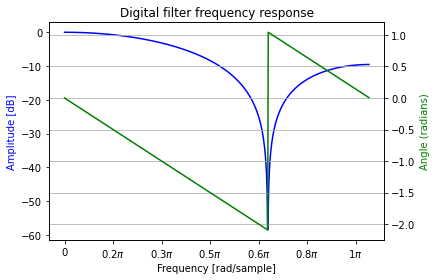

Zeros:
[-0.5+0.8660254j -0.5-0.8660254j]
Polos:
[0. 0.]


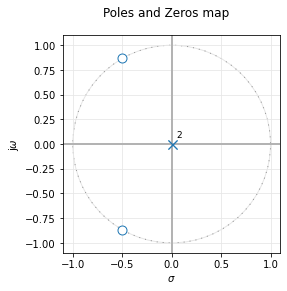

In [53]:
### from scipy import signal
from splane import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


num=[1,1,1]
den=[3,0,0]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

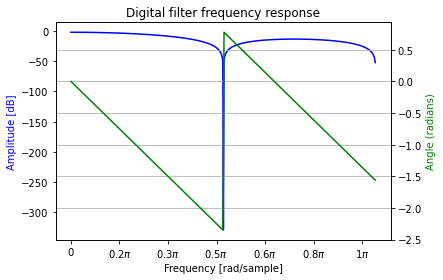

Zeros:
[-1.00000000e+00+0.j -7.77156117e-16+1.j -7.77156117e-16-1.j]
Polos:
[0. 0. 0.]


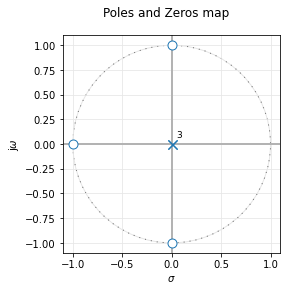

In [54]:
num=[1,1,1,1]
den=[5,0,0,0]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())


$\frac{Y(Z)}{X(Z)}=(1-c_1Z^{-N}) \cdot \frac{b_0+b_1Z^{-1}+b_2Z^{-2}}{(\frac{1}{a_0}-a_1Z^{-1}-a_2Z^{-2})}$


## Punto d

Qué tipo de transferencia se obtendría si : $a_0=1, a_1=1-\alpha , b0=\alpha$ para $\alpha=0.9$

a) $$H(Z)=\frac{0.9Z}{(Z-0.1)}$$


Al ser un filtro integrador vamos a obtener un filtro pasa bajo.Veamos...:

$H(e^{j\Omega})=\frac{0.9e^{j\Omega}}{(e^{j\Omega}-0.1)}$

$|H(e^{j\Omega})|=\frac{|0.9e^{j\Omega}|}{|(e^{j\Omega}-0.1)|}$

$|H(e^{j\Omega})|=\frac{0.9}{|cos(\Omega)-0.1+jsin(\Omega))|}$


$|H(e^{j\Omega})|=\frac{0.9}{\sqrt{(cos(\Omega)-0.1)^2+(sin(\Omega))^2)}}$


$|H(e^{j\Omega})|=\frac{0.9}{\sqrt{cos^2(\Omega)-0.2\cdot cos(\Omega)+0.01+sin^2(\Omega)}}$

Como $cos^2(x)+sin^2(x)=1$

$|H(e^{j\Omega})|=\frac{0.9}{\sqrt{1.01-0.2\cdot cos(\Omega)}}$


<img src="./filtro ej4d.png" align="center" width="600" /> 



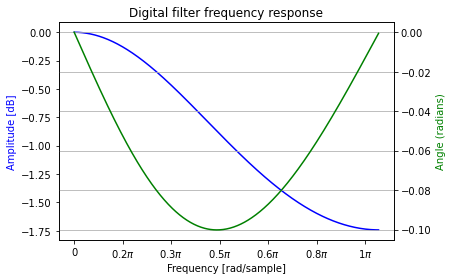

Zeros:
[0.]
Polos:
[0.1]


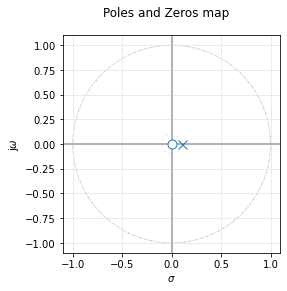

In [55]:
num=[0.9,0]
den=[1,-0.1]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

Dado el sistema discreto $H(z)=\frac{z}{z−0.8}$, determine la expresión de y[n] al excitarlo con una señal $x[n]=20\cdot cos(\frac{n\pi}{2}+30º)$


$H(e^{j\Omega})=\frac{e^{j\Omega}}{e^{j\Omega}-0.8}$

Cuando $\Omega=\frac{\pi}{2}$

$H(e^{j\Omega})=\frac{e^{j\Omega}}{e^{j\Omega}-0.8}$

$H(e^{j\frac{\pi}{2}})=\frac{e^{j\frac{\pi}{2}}}{e^{j\frac{\pi}{2}}-0.8}$

$|H(e^{j\frac{\pi}{2}})|=\frac{|e^{j\frac{\pi}{2}}|}{|e^{j\frac{\pi}{2}}-0.8|}$

$|H(e^{j\frac{\pi}{2}})|=\frac{1}{|j1-0.8|}$

$|H(e^{j\frac{\pi}{2}})|=\frac{1}{|j1-0.8|}$

$|H(e^{j\frac{\pi}{2}})|=\frac{1}{\sqrt{1+(0.8)^2}}$

$|H(e^{j\frac{\pi}{2}})|=0.78$

$y[n]=20\cdot 0.78\cdot cos(\frac{n\pi}{2}+30º)$

$y[n]=15.6 \cdot cos(\frac{n\pi}{2}+30º)$




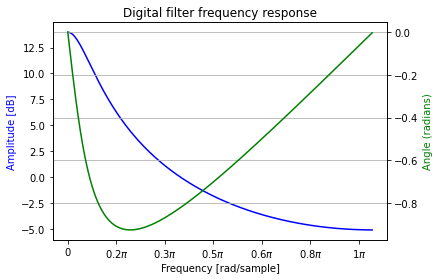

Zeros:
[]
Polos:
[0.8]


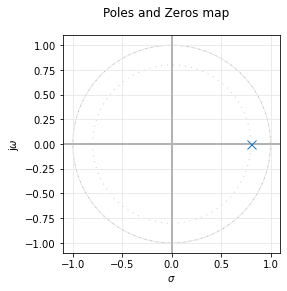

In [56]:
num=[1]
den=[1,-0.8]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

#### Ejercicio 6

Considerando la siguiente ecuación en diferencias de un sistema discreto:

$y[n]=2 y[n−1]−1,81.y[n−2]+0,68.y[n−3]+x[n]+3.x[n−1]+3.x[n−2]+x[n−3]$

Se pide hallar:

* La expresión de la función transferencia $H(z)$
* Módulo y fase de $H(e^{j\Omega})$
* La secuencia de salida y[n] cuando el sistema es excitado con la siguiente señal:

$$x(t)=10+5.cos(2\pi 2000t−60º)+20.sen(2 \pi 8000t+30º)$$




$$Y(Z)-2Y(Z)Z^{-1}+1.81Y(Z)Z^{-2}-0.68Y(Z)Z^{-3}=X(Z)+3X(Z)Z^{-1}+3X(Z)Z^{-2}+X(Z)Z^{-3}$$

$$Y(Z)(1-2Z^{-1}+1.81Z^{-2}-0.68Z^{-3})=X(Z)(1+3Z^{-1}+3Z^{-2}+Z^{-3})$$

$$H(Z)=\frac{Y(Z)}{X(Z)}=\frac{1+3Z^{-1}+3Z^{-2}+Z^{-3}}{1-2Z^{-1}+1.81Z^{-2}-0.68Z^{-3}}$$

$$H(Z)=\frac{Y(Z)}{X(Z)}=\frac{Z^3+3Z^2+3Z+1}{Z^3-2Z^2+1.81Z-0.68}$$

$$H(e^{j\Omega})=\frac{e^{j3\Omega}+3e^{j2\Omega}+3e^{j\Omega}+1}{e^{j3\Omega}-2e^{j2\Omega}+1.81e^{j\Omega}-0.68}$$




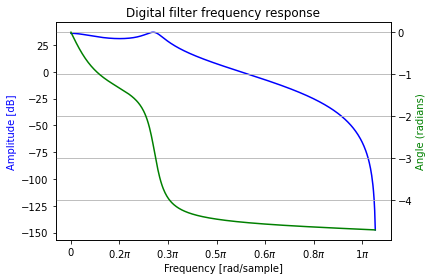

Zeros:
[-0.99999672+5.68937417e-06j -0.99999672-5.68937417e-06j
 -1.00000657+0.00000000e+00j]
Polos:
[0.6+0.7j 0.6-0.7j 0.8+0.j ]


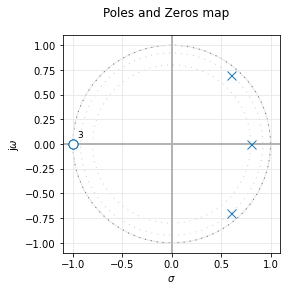

In [57]:
num=[1,3,3,1]
den=[1,-2,1.81,-0.68]

w, h = signal.freqz(num, den)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

z,p,k=signal.tf2zpk(num, den)
print("Zeros:")
print(z)
print("Polos:")
print(p)

filter_names=("  ")
 
tf = TransferFunction(num,den)
analog_fig_id, analog_axes_hdl = pzmap(tf, filter_names, 3, ())

#### Ejercicio 7

Obtenga la expresión $H(z)$ de los siguientes sistemas. Indique de qué tipo de filtros se trata.

<img src="./ej8.png" align="center" width="800" /> 


a)

$$a_0X(Z)+a_1X(Z)Z^{-1}+a_2X(X)Z^{-2}-b_1Y(Z)Z^{-1}-b_2Y(Z)Z^{-2}=Y(Z)$$

$$X(Z)(a_0+a_1Z^{-1}+a_2Z^{-2})=Y(Z)(1+b_1Z^{-1}+b_2Z^{-2})$$

$$H(Z)=\frac{Y(Z)}{X(Z)}=\frac{a_0+a_1Z^{-1}+a_2Z^{-2}}{1+b_1Z^{-1}+b_2Z^{-2}}$$

$$H(Z)=\frac{Y(Z)}{X(Z)}=\frac{a_0Z^2+a_1Z+a_2}{Z^2+b_1Z+b_2}$$



b)

$$X(Z)-b_1B(Z)Z^{-1}-b_2B(Z)Z^{-2}=B(Z)$$

$$a_0B(Z)+a_1B(Z)Z^{-1}+a_2B(Z)Z^{-2}=Y(Z)$$

$$X(Z)=B(Z)(1+b_1Z^{-1}+b_2Z^{-2})$$

$$\frac{X(Z)}{1+b_1Z^{-1}+b_2Z^{-2}}=B(Z)$$

$$B(Z)(a_0+a_1Z^{-1}+a_2Z^{-2})=Y(Z)$$

$$\frac{X(Z)}{1+b_1Z^{-1}+b_2Z^{-2}}\cdot (a_0+a_1Z^{-1}+a_2Z^{-2})=Y(Z)$$

$$H(Z)=\frac{a_0+a_1Z^{-1}+a_2Z^{-2}}{1+b_1Z^{-1}+b_2Z^{-2}}$$

$$H(Z)=\frac{a_0Z^2+a_1Z+a_2}{Z^2+b_1Z+b_2}$$







c)

$$[(a_2X(Z)-b_2Y(Z))Z^{-1}+a_1X(Z)-b_1Y(Z)]Z^{-1}+a_0X(Z)=Y(Z)$$

$$a_2X(Z)Z^{-2}-b_2Y(Z)Z^{-2}+a_1X(Z)Z^{-1}-b_1Y(Z)Z^{-1}+a_0X(Z)=Y(Z)$$

$$X(Z)(a_2Z^{-2}+a_1Z^{-1}+a_0)=Y(Z)(1+b_1Z^{-1}+b_2Z^{-2})$$

$$H(Z)=\frac{a_2Z^{-2}+a_1Z^{-1}+a_0}{1+b_1Z^{-1}+b_2Z^{-2}}$$

$$H(Z)=\frac{a_2+a_1Z+a_0Z^2}{Z^2+b_1Z+b_2}$$

$$H(Z)=\frac{a_0Z^2+a_1Z+a_2}{Z^2+b_1Z+b_2}$$

Todos los filtros son equivalentes y representan estructuras BiCuad